In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from scipy.stats import pearsonr
import statsmodels.api as sm

In [6]:
file_path = "C:/Users/user/Desktop/han-toss-dashboard/data/ecos.csv"
df = pd.read_csv(file_path)
df

,DATE,aptpriceindex,cd,unemploymentrate,constructionpricerate,cpi
0,2015/01,73.1,2.00,3.7,100.40,94.643
1,2015/02,73.3,2.00,4.5,100.18,94.587
2,2015/03,73.7,1.75,4.0,100.07,94.596
3,2015/04,74.3,1.75,3.9,99.76,94.625
4,2015/05,74.8,1.75,3.7,99.69,94.890
...,...,...,...,...,...,...
106,2023/11,93.1,3.50,2.3,153.31,112.680
107,2023/12,93.0,3.50,3.3,153.22,112.730
108,2024/01,92.7,3.50,3.7,154.52,113.170
109,2024/02,92.5,3.50,3.2,154.83,113.780


In [7]:
df['DATE']

0      2015/01
1      2015/02
2      2015/03
3      2015/04
4      2015/05
        ...   
106    2023/11
107    2023/12
108    2024/01
109    2024/02
110    2024/03
Name: DATE, Length: 111, dtype: object

#df.set_index('DATE', inplace=True)
df_1 = df.loc[[0,12,24,36,48,60,72,84,96,108],:]
df_1

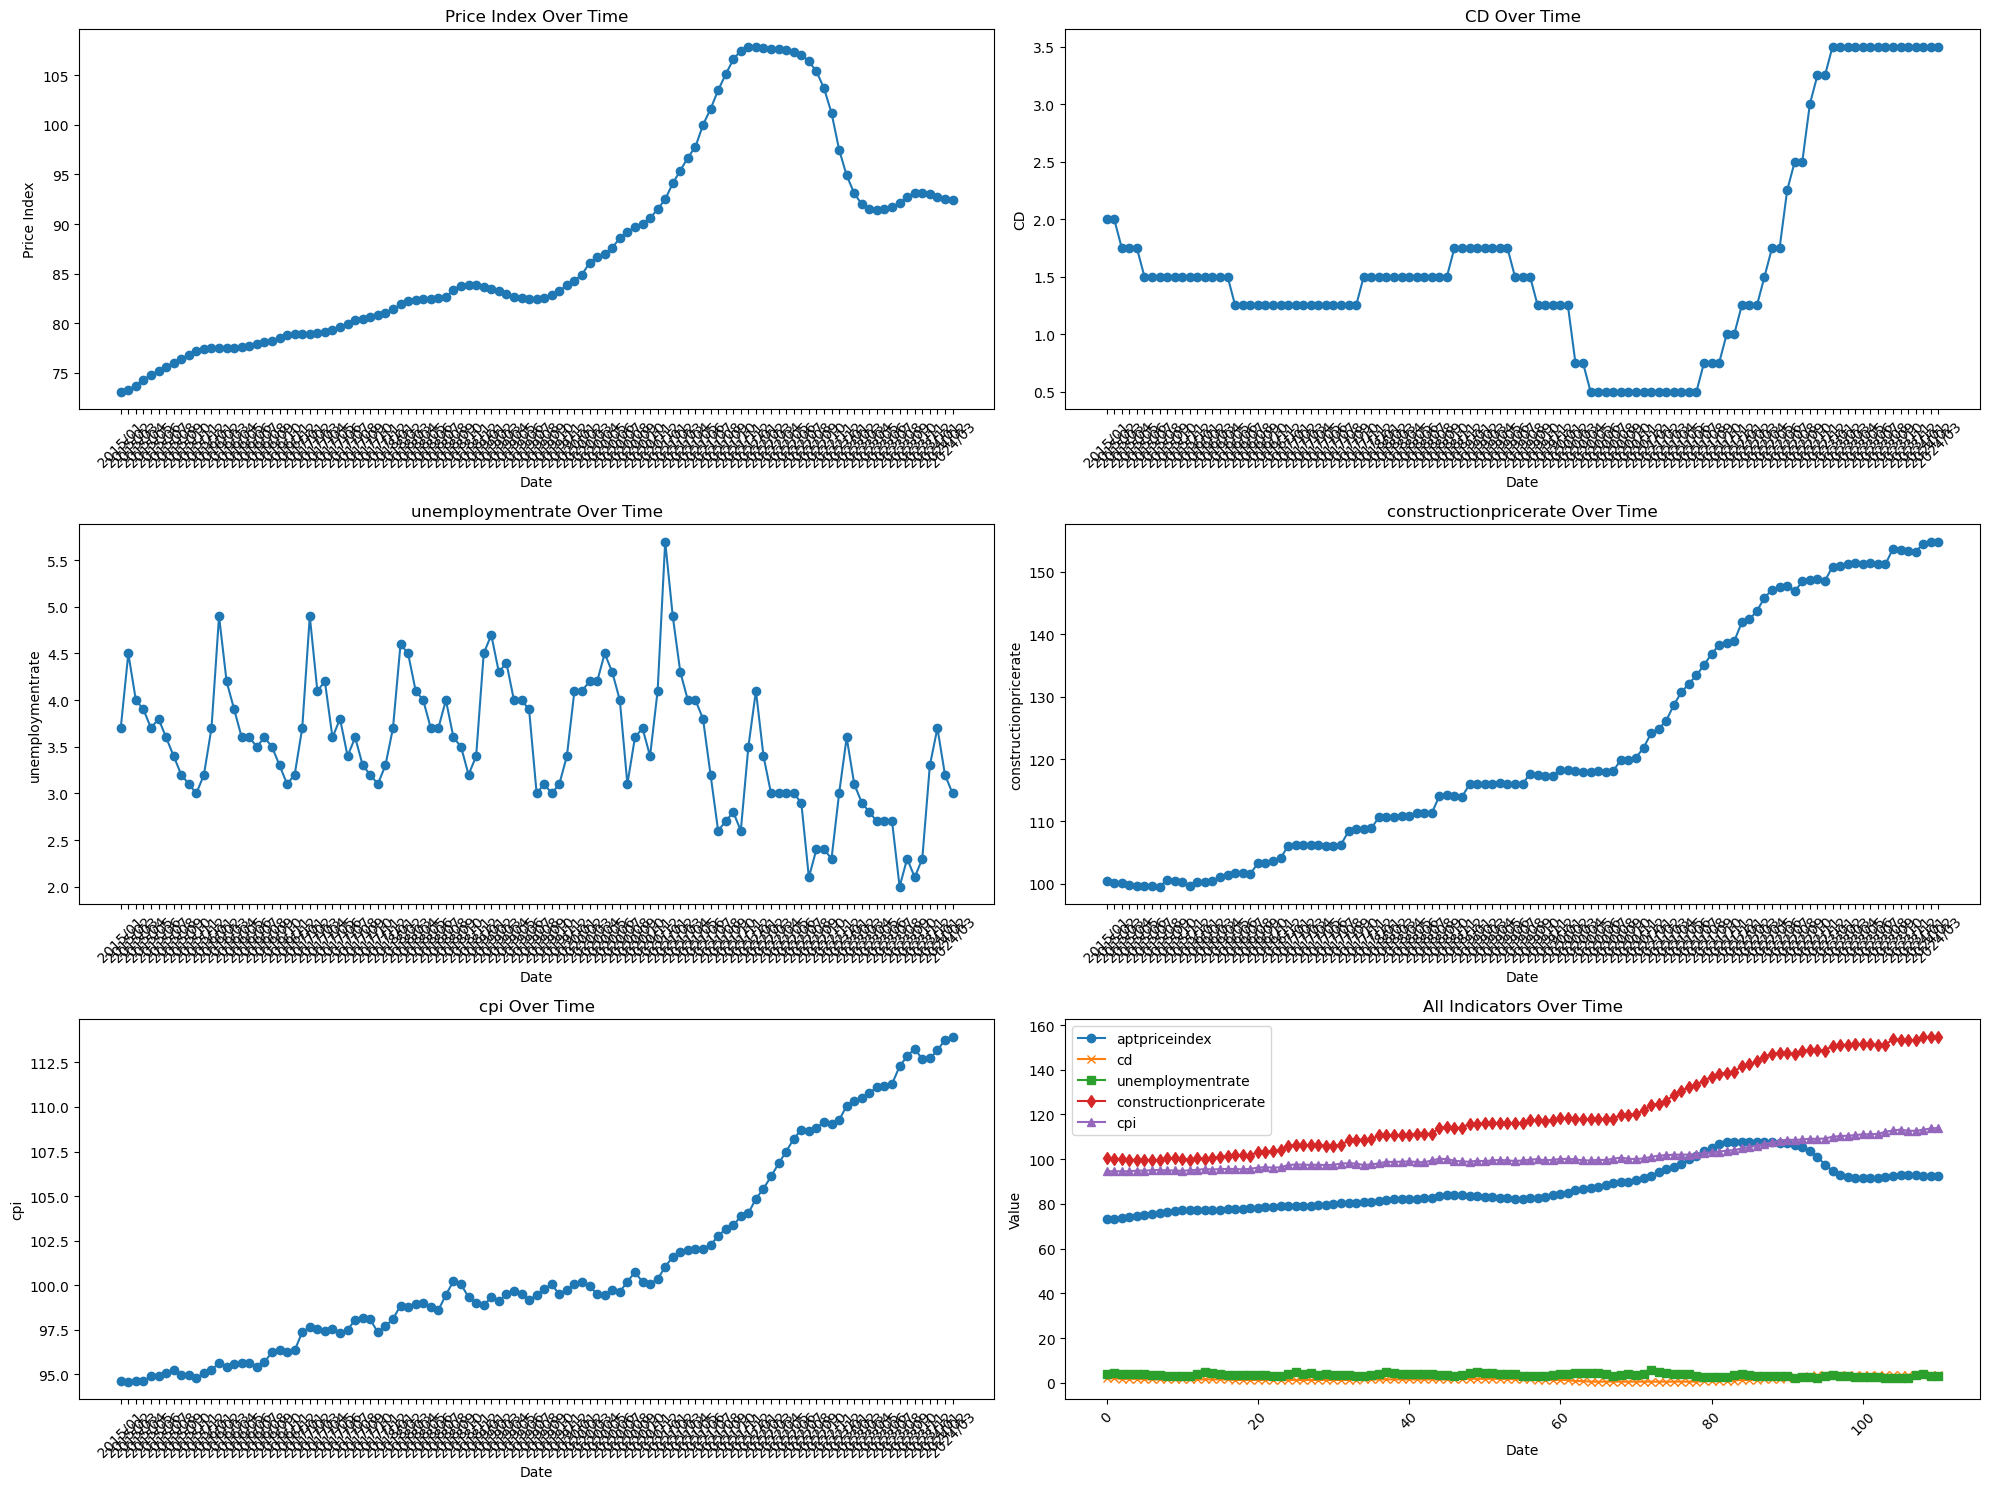

In [11]:
fig, ax = plt.subplots(3,2, figsize = (20,15))
# 첫 번째 서브플롯
ax[0, 0].plot(df['DATE'], df['aptpriceindex'], marker='o')
ax[0, 0].set_xlabel('Date')
ax[0, 0].set_ylabel('Price Index')
ax[0, 0].set_title('Price Index Over Time')

ax[0, 1].plot(df['DATE'], df['cd'], marker='o')
ax[0, 1].set_xlabel('Date')
ax[0, 1].set_ylabel('CD')
ax[0, 1].set_title('CD Over Time')

ax[1, 0].plot(df['DATE'], df['unemploymentrate'], marker='o')
ax[1, 0].set_xlabel('Date')
ax[1, 0].set_ylabel('unemploymentrate')
ax[1, 0].set_title('unemploymentrate Over Time')

ax[1, 1].plot(df['DATE'], df['constructionpricerate'], marker='o')
ax[1, 1].set_xlabel('Date')
ax[1, 1].set_ylabel('constructionpricerate')
ax[1, 1].set_title('constructionpricerate Over Time')

ax[2, 0].plot(df['DATE'], df['cpi'], marker='o')
ax[2, 0].set_xlabel('Date')
ax[2, 0].set_ylabel('cpi')
ax[2, 0].set_title('cpi Over Time')


# 다섯 가지 지표를 한 그래프에 표시
ax[2, 1].plot(df.index, df['aptpriceindex'], marker='o', label='aptpriceindex')
ax[2, 1].plot(df.index, df['cd'], marker='x', label='cd')
ax[2, 1].plot(df.index, df['unemploymentrate'], marker='s', label='unemploymentrate')
ax[2, 1].plot(df.index, df['constructionpricerate'], marker='d', label='constructionpricerate')
ax[2, 1].plot(df.index, df['cpi'], marker='^', label='cpi')
ax[2, 1].set_xlabel('Date')
ax[2, 1].set_ylabel('Value')
ax[2, 1].set_title('All Indicators Over Time')
ax[2, 1].legend()




# 날짜 레이블이 잘 보이도록 회전
for ax_row in ax:
    for ax_item in ax_row:
        for label in ax_item.get_xticklabels():
            label.set_rotation(45)
            
# 레이아웃 조정
plt.tight_layout()

# 그래프 보여주기
plt.show()

df_1.set_index('DATE', inplace=True)

# 데이터프레임의 모든 열을 숫자로 변환
df_1 = df_1.apply(pd.to_numeric, errors='coerce')

# aptpriceindex과 다른 변수들 간의 상관관계 계산
variables = ['cd', 'unemploymentrate', 'constructionpricerate']
correlations = {}

for var in variables:
    corr, p_value = pearsonr(df_1['aptpriceindex'], df_1[var])
    correlations[var] = (corr, p_value)

# 상관관계 결과 출력
for var, (corr, p_value) in correlations.items():
    print(f"The correlation between aptpriceindex and {var} is {corr:.2f} with a p-value of {p_value:.2f}")

In [12]:
X = df[['cd', 'unemploymentrate', 'constructionpricerate', 'cpi']]
y = df['aptpriceindex']
# 상수 추가
X = sm.add_constant(X)

# 회귀 모델 적합
model = sm.OLS(y, X).fit()

# 회귀 분석 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:          aptpriceindex   R-squared:                       0.945
Model:                            OLS   Adj. R-squared:                  0.943
Method:                 Least Squares   F-statistic:                     452.9
Date:                Tue, 16 Jul 2024   Prob (F-statistic):           1.16e-65
Time:                        09:05:16   Log-Likelihood:                -252.26
No. Observations:                 111   AIC:                             514.5
Df Residuals:                     106   BIC:                             528.1
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                   177.32